# Healthcare Project

## Problem Statement:

### NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases. The dataset used in this project is originally from NIDDK. 
## Objective:
### The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
### Building a model to accurately predict whether the patients in the dataset have diabetes or not.

## Dataset Description:

### Variables	  ------------>                                                     Description
### Pregnancies	     ------------>                                    Number of times pregnant
### Glucose	         ------------>                                       Plasma glucose concentration in an oral glucose tolerance test
### BloodPressure	 ------------>                                  Diastolic blood pressure (mm Hg)
### SkinThickness	------------>                                   Triceps skinfold thickness (mm)
### Insulin	        ------------>                                           Two hour serum insulin
### BMI	           ------------>                                             Body Mass Index
### DiabetesPedigreeFunction	------------>              Diabetes pedigree function
### Age	           ------------>                                             Age in years
### Outcome	  ------------>                      Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('health care diabetes.csv')

In [8]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.shape

(768, 9)

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Histograms

(array([246., 178., 125.,  50.,  83.,  52.,  11.,  19.,   3.,   1.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

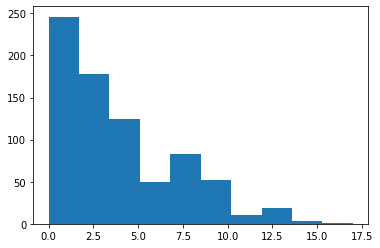

In [9]:
plt.hist(data['Pregnancies'])

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

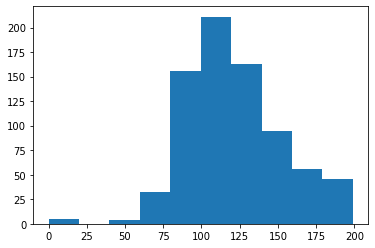

In [10]:
plt.hist(data['Glucose'])

(array([ 35.,   1.,   2.,  13., 107., 261., 243.,  87.,  14.,   5.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <BarContainer object of 10 artists>)

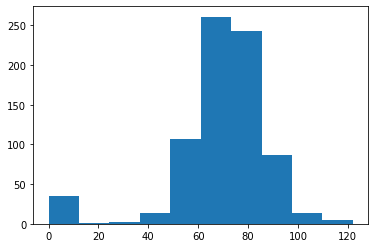

In [11]:
plt.hist(data['BloodPressure'])

(array([231., 107., 165., 175.,  78.,   9.,   2.,   0.,   0.,   1.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

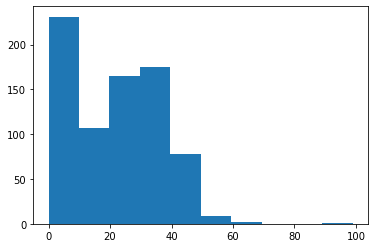

In [12]:
plt.hist(data['SkinThickness'])

(array([487., 155.,  70.,  30.,   8.,   9.,   5.,   1.,   2.,   1.]),
 array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
        761.4, 846. ]),
 <BarContainer object of 10 artists>)

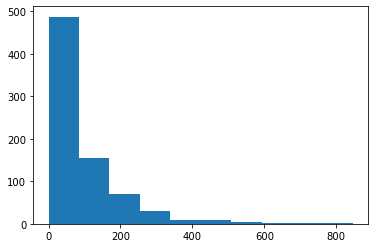

In [13]:
plt.hist(data['Insulin'])

(array([ 11.,   0.,  15., 156., 268., 224.,  78.,  12.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <BarContainer object of 10 artists>)

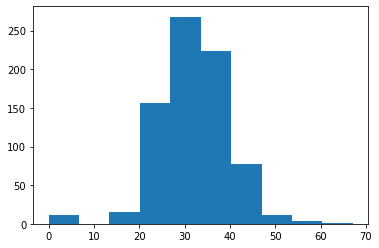

In [14]:
plt.hist(data['BMI'])

(array([318., 206., 136.,  58.,  25.,  15.,   3.,   3.,   1.,   3.]),
 array([0.078 , 0.3122, 0.5464, 0.7806, 1.0148, 1.249 , 1.4832, 1.7174,
        1.9516, 2.1858, 2.42  ]),
 <BarContainer object of 10 artists>)

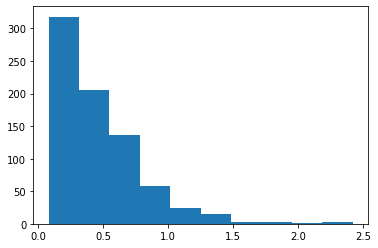

In [15]:
plt.hist(data['DiabetesPedigreeFunction'])

(array([300., 157.,  92.,  86.,  52.,  34.,  26.,  16.,   4.,   1.]),
 array([21., 27., 33., 39., 45., 51., 57., 63., 69., 75., 81.]),
 <BarContainer object of 10 artists>)

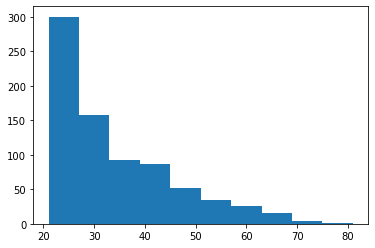

In [16]:
plt.hist(data['Age'])

#### Finding the number of missing values

In [20]:
data[data['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [25]:
data[data['Glucose'] == 0].count()

Pregnancies                 5
Glucose                     5
BloodPressure               5
SkinThickness               5
Insulin                     5
BMI                         5
DiabetesPedigreeFunction    5
Age                         5
Outcome                     5
dtype: int64

In [21]:
data[data['BloodPressure'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [26]:
data[data['BloodPressure'] == 0].count()

Pregnancies                 35
Glucose                     35
BloodPressure               35
SkinThickness               35
Insulin                     35
BMI                         35
DiabetesPedigreeFunction    35
Age                         35
Outcome                     35
dtype: int64

In [27]:
data[data['SkinThickness'] == 0].count()

Pregnancies                 227
Glucose                     227
BloodPressure               227
SkinThickness               227
Insulin                     227
BMI                         227
DiabetesPedigreeFunction    227
Age                         227
Outcome                     227
dtype: int64

In [28]:
data[data['SkinThickness'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [29]:
data[data['Insulin'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [30]:
data[data['Insulin'] == 0].count()

Pregnancies                 374
Glucose                     374
BloodPressure               374
SkinThickness               374
Insulin                     374
BMI                         374
DiabetesPedigreeFunction    374
Age                         374
Outcome                     374
dtype: int64

In [33]:
data[data['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [34]:
data[data['BMI'] == 0].count()

Pregnancies                 11
Glucose                     11
BloodPressure               11
SkinThickness               11
Insulin                     11
BMI                         11
DiabetesPedigreeFunction    11
Age                         11
Outcome                     11
dtype: int64

#### Countplot

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

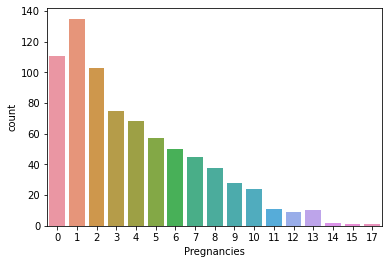

In [35]:
sns.countplot(data['Pregnancies'])

<AxesSubplot:xlabel='Outcome', ylabel='count'>

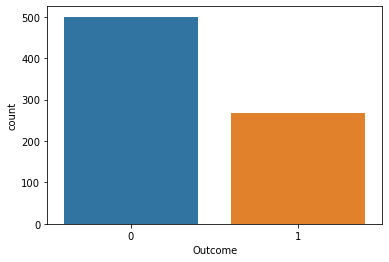

In [36]:
sns.countplot(data['Outcome'])

<AxesSubplot:xlabel='Age', ylabel='count'>

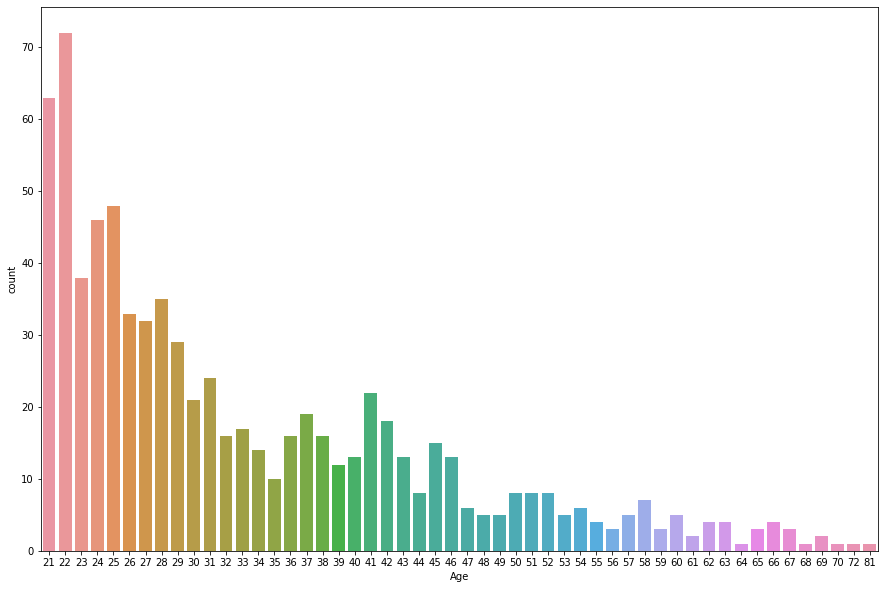

In [40]:
plt.figure(figsize = (15,10))
sns.countplot(data['Age'])

#### Treating Missing Values

In [41]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [42]:
data.corr()['Glucose']

Pregnancies                 0.129459
Glucose                     1.000000
BloodPressure               0.152590
SkinThickness               0.057328
Insulin                     0.331357
BMI                         0.221071
DiabetesPedigreeFunction    0.137337
Age                         0.263514
Outcome                     0.466581
Name: Glucose, dtype: float64

In [47]:
data[['Glucose','Insulin', 'Outcome']].head(20)

,Glucose,Insulin,Outcome
0,148,0,1
1,85,0,0
2,183,0,1
3,89,94,0
4,137,168,1
5,116,0,0
6,78,88,1
7,115,0,0
8,197,543,1
9,125,0,1


In [48]:
data[['Glucose','Insulin', 'Outcome']].tail(20)

,Glucose,Insulin,Outcome
748,187,200,1
749,162,0,1
750,136,0,1
751,121,74,0
752,108,0,0
753,181,510,1
754,154,0,1
755,128,110,1
756,137,0,0
757,123,0,1


##### As per the medical findings, if Glucose > 140, the person is diabetic
##### if Insulin > 166, the person is diabetic

In [49]:
df = data.copy()

In [59]:
df.groupby('Outcome')['Glucose'].median()

Outcome
0    107.0
1    140.0
Name: Glucose, dtype: float64

In [67]:
df['Glucose']=df['Glucose'].replace(0, np.nan)

In [68]:
df['Glucose'] = df['Glucose'].fillna(df.groupby('Outcome')['Glucose'].transform('median'))

In [69]:
df['Glucose'].isnull().sum()

0

In [70]:
df['BMI']=df['BMI'].replace(0, np.nan)
df['Insulin']=df['Insulin'].replace(0, np.nan)
df['BloodPressure']=df['BloodPressure'].replace(0, np.nan)
df['SkinThickness']=df['SkinThickness'].replace(0, np.nan)

In [71]:
df['Insulin'] = df['Insulin'].fillna(df.groupby('Outcome')['Insulin'].transform('median'))

In [72]:
df['Insulin'].isnull().sum()

0

In [73]:
df['BMI'] = df['BMI'].fillna(df.groupby('Outcome')['BMI'].transform('median'))

In [74]:
df['BMI'].isnull().sum()

0

In [75]:
df['BloodPressure'] = df['BloodPressure'].fillna(df.groupby('Outcome')['BloodPressure'].transform('median'))

In [76]:
df['BloodPressure'].isnull().sum()

0

In [77]:
df['SkinThickness'] = df['SkinThickness'].fillna(df.groupby('Outcome')['SkinThickness'].transform('median'))

In [78]:
df['SkinThickness'].isnull().sum()

0

In [79]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [80]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,70.0,27.0,102.5,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,32.0,169.5,34.3,0.232,54,1


## Data Exploration

In [81]:
df['Outcome'].count()

768

<AxesSubplot:xlabel='Outcome', ylabel='count'>

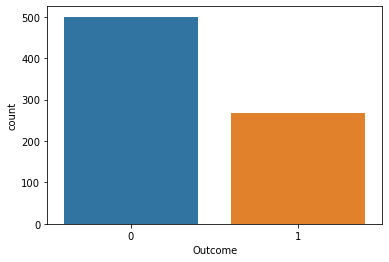

In [82]:
sns.countplot(df['Outcome'])

#### It's clear that the dataset is highly imbalanced. Let's use SMOTE technique to upsample the data after doing train test split

### Scatter Charts

<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

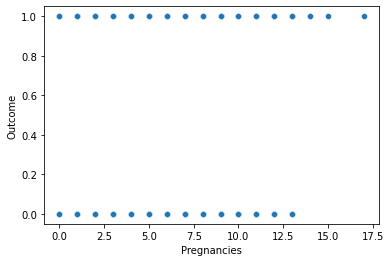

In [84]:
sns.scatterplot(df['Pregnancies'] , df['Outcome'])

<AxesSubplot:xlabel='Glucose', ylabel='Outcome'>

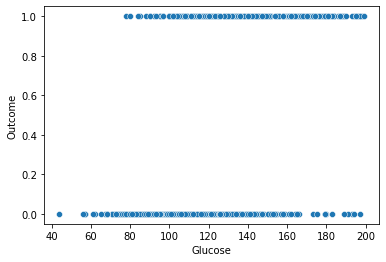

In [85]:
sns.scatterplot(df['Glucose'] , df['Outcome'])

<AxesSubplot:xlabel='Insulin', ylabel='Outcome'>

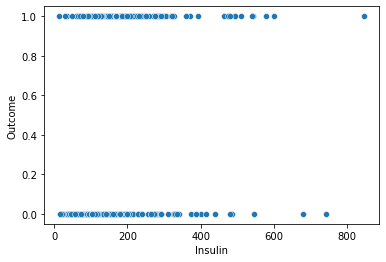

In [86]:
sns.scatterplot(df['Insulin'] , df['Outcome'])

<AxesSubplot:xlabel='BloodPressure', ylabel='Outcome'>

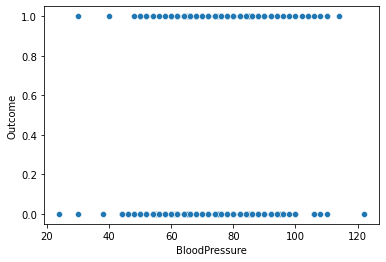

In [87]:
sns.scatterplot(df['BloodPressure'] , df['Outcome'])

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

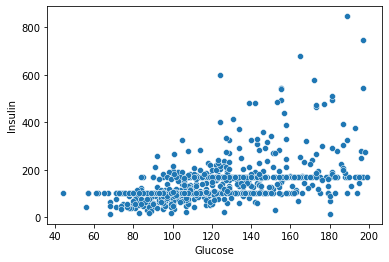

In [88]:
sns.scatterplot(df['Glucose'] , df['Insulin'])

<AxesSubplot:xlabel='Glucose', ylabel='BloodPressure'>

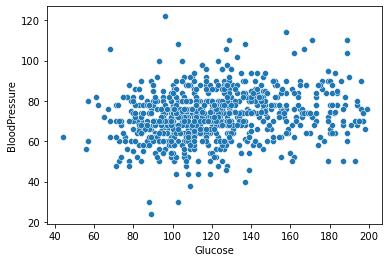

In [89]:
sns.scatterplot(df['Glucose'] , df['BloodPressure'])

<AxesSubplot:xlabel='Glucose', ylabel='SkinThickness'>

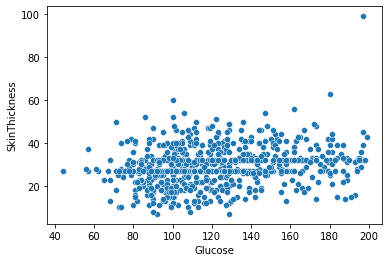

In [90]:
sns.scatterplot(df['Glucose'] , df['SkinThickness'])

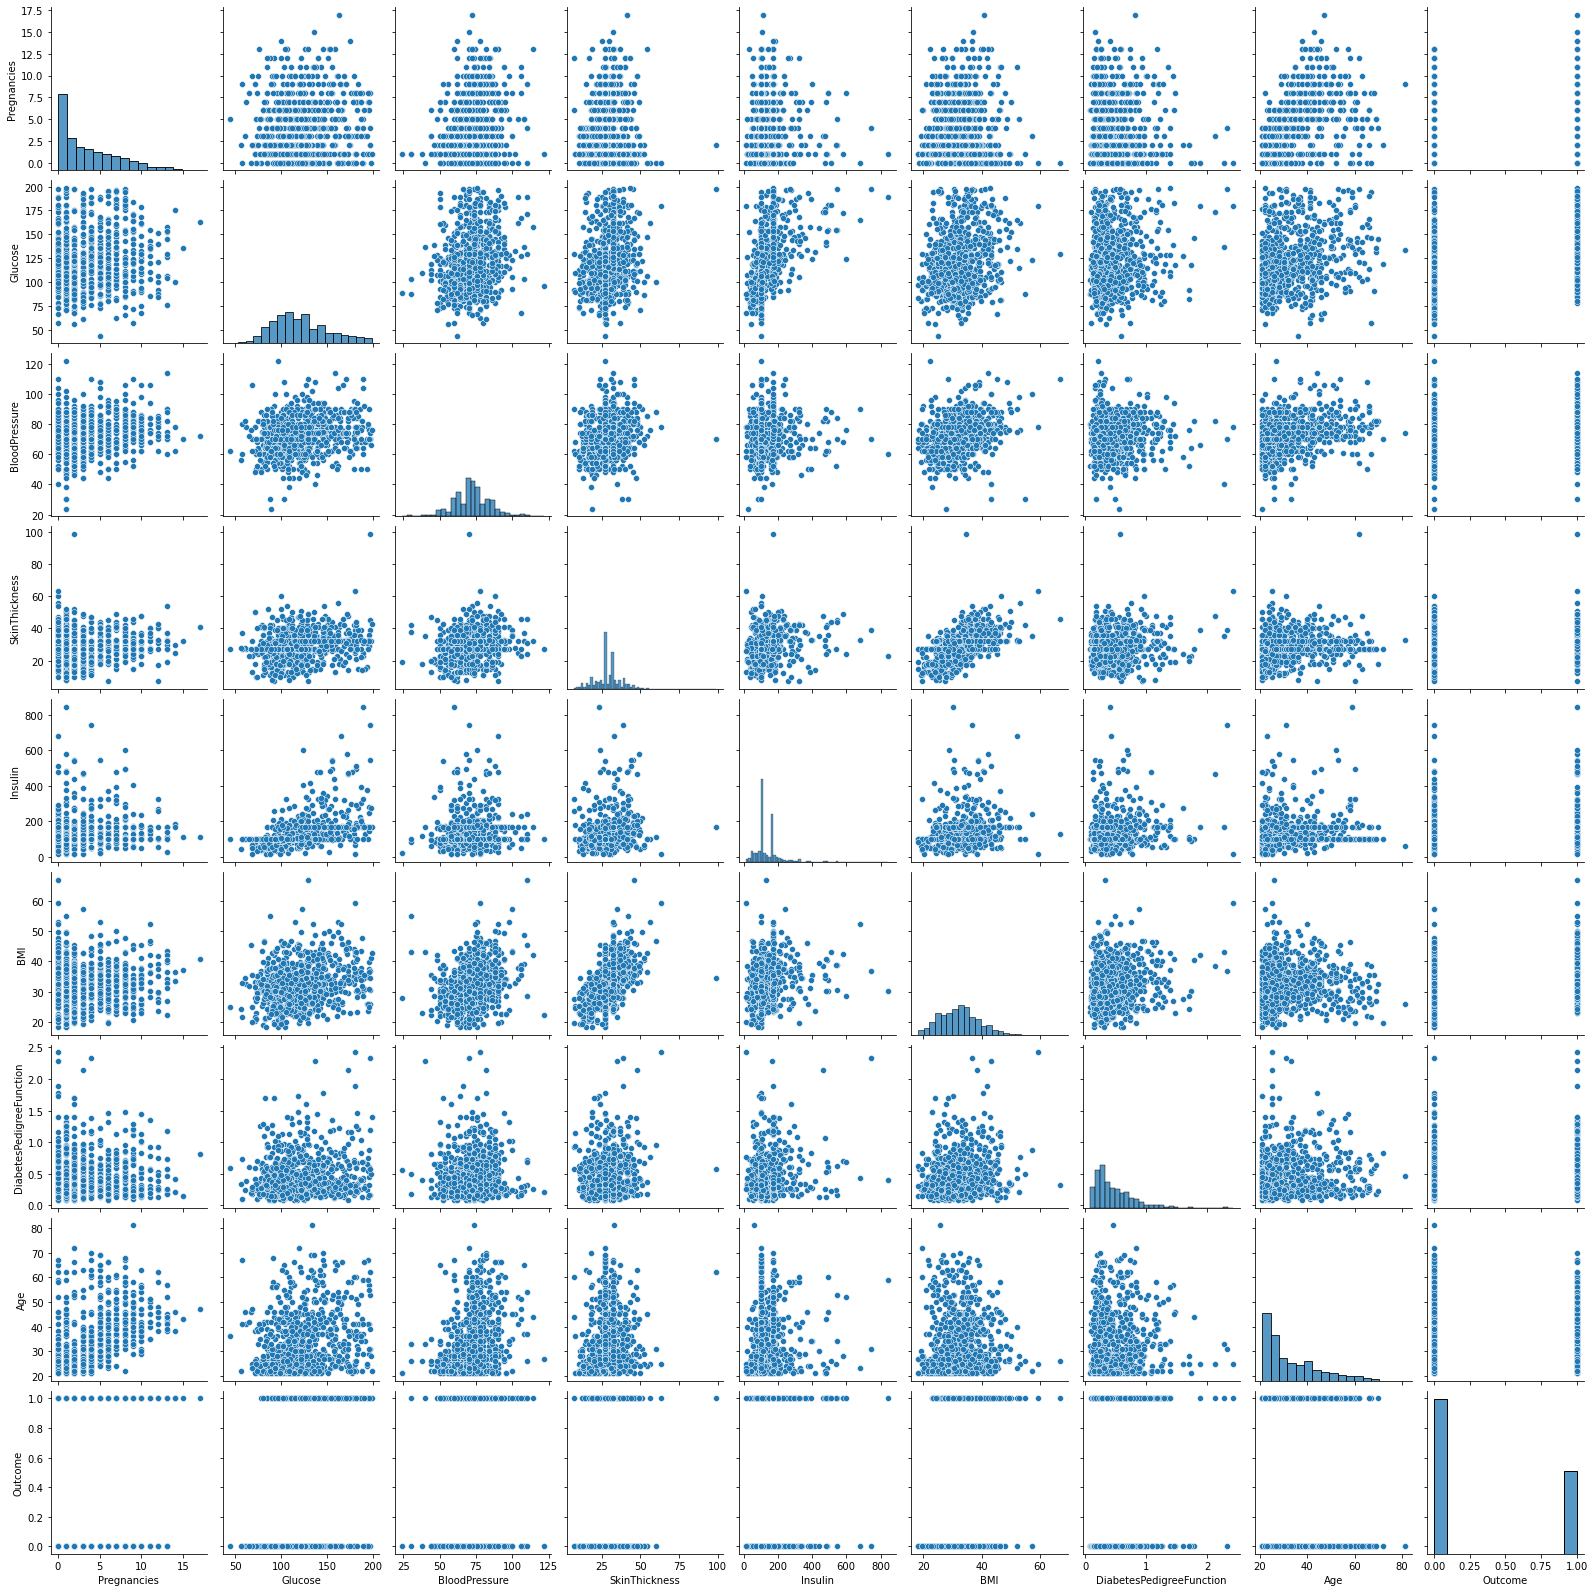

In [91]:
sns.pairplot(df)

#### It is found from the scatter plots that all the given variables are connected to the outcome. 
#### To determine whether the person is diabetic or not, we require all the available features. 

## Heatmap

<AxesSubplot:>

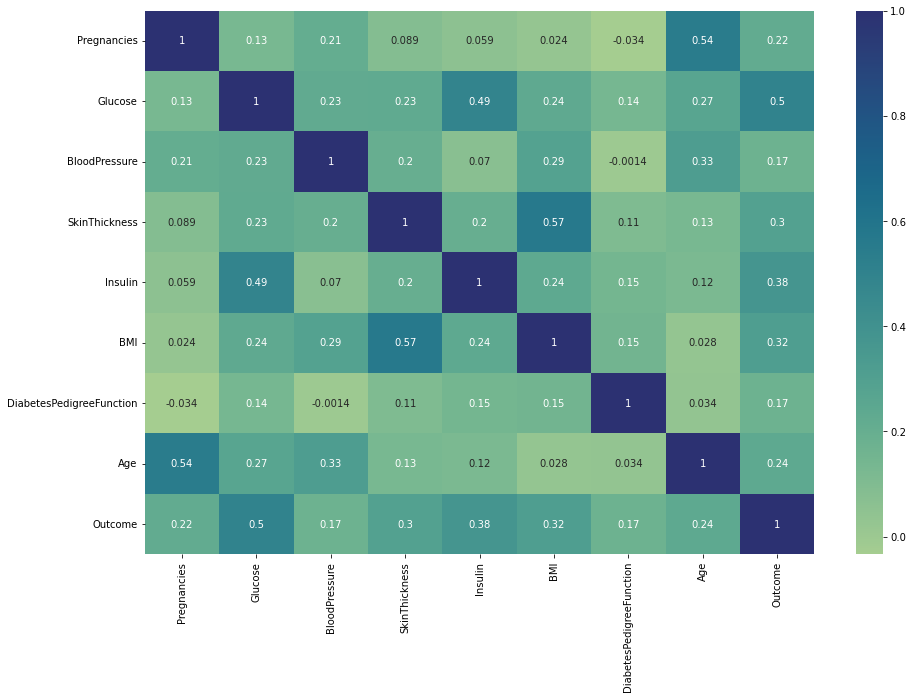

In [92]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, cmap="crest")

# Data Modelling

### Train And Test split

In [93]:
from sklearn.model_selection import train_test_split


In [94]:
X = df.drop('Outcome' , axis = 1)
y= df['Outcome']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Blancing Dataset using upsampling technique

In [96]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_sm.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_sm.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm == 0)))

After OverSampling, the shape of train_X: (802, 8)
After OverSampling, the shape of train_y: (802,) 

After OverSampling, counts of label '1': 401
After OverSampling, counts of label '0': 401


#### Normalizing Data

In [97]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_sm)
X_test = scaler.transform(X_test)

In [98]:
y_train = y_train_sm

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

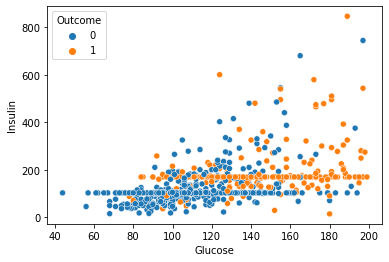

In [103]:
sns.scatterplot( data = df , x = 'Glucose' , y = 'Insulin' , hue = 'Outcome')

### Creating the model

#### Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
lr = LogisticRegression()
lr.fit(X_train , y_train)

LogisticRegression()

In [106]:
pred = lr.predict(X_test)


In [107]:
from sklearn.metrics import accuracy_score, classification_report

In [108]:
accuracy_score(y_test,pred)

0.7597402597402597

In [109]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80        99
           1       0.63      0.80      0.70        55

    accuracy                           0.76       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.78      0.76      0.76       154



#### Random Forest Classifier

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [112]:
pred = rfc.predict(X_test)

In [113]:
accuracy_score(y_test,pred)

0.8636363636363636

In [114]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        99
           1       0.77      0.87      0.82        55

    accuracy                           0.86       154
   macro avg       0.85      0.87      0.86       154
weighted avg       0.87      0.86      0.87       154



#### XGBoost Classifier

In [119]:
from xgboost import XGBClassifier 

In [120]:
xgbc = XGBClassifier(random_state = 42)

In [121]:
xgbc.fit(X_train, y_train)

XGBClassifier(random_state=42)

In [122]:
pred = rfc.predict(X_test)

In [123]:
accuracy_score(y_test,pred)

0.8636363636363636

In [124]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        99
           1       0.77      0.87      0.82        55

    accuracy                           0.86       154
   macro avg       0.85      0.87      0.86       154
weighted avg       0.87      0.86      0.87       154



### Support Vector Machine

In [125]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
svmc = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svmc.fit(X_train, y_train)

#Predict the response for test dataset
pred = svmc.predict(X_test)


In [126]:
accuracy_score(y_test,pred)

0.7402597402597403

In [127]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.70      0.78        99
           1       0.60      0.82      0.69        55

    accuracy                           0.74       154
   macro avg       0.74      0.76      0.73       154
weighted avg       0.78      0.74      0.75       154



#### Hyperparmeter Tuning

#### Random Forest Classifier

In [129]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

In [130]:
param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}


In [131]:
rf_clf = RandomForestClassifier(random_state=25,n_jobs=-1)

In [137]:
rf_random = RandomizedSearchCV(rf_clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='accuracy',random_state=25,return_train_score=True)

In [138]:
rf_random.fit(X_train , y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])


mean test scores [0.87165123 0.87541667 0.87416667 0.87540123 0.87541667]
mean train scores [0.88750523 0.88778205 0.88584203 0.88598073 0.89055271]


In [139]:
print(rf_random.best_estimator_)


RandomForestClassifier(max_depth=12, min_samples_leaf=33, min_samples_split=138,
                       n_estimators=109, n_jobs=-1, random_state=25)


In [141]:
rf_clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=33, min_samples_split=138,
            min_weight_fraction_leaf=0.0, n_estimators=109, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)


In [142]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=12, max_features='auto', min_samples_leaf=33,
                       min_samples_split=138, n_estimators=109, n_jobs=-1,
                       random_state=25)

In [145]:
pred_rfc = rf_clf.predict(X_test)

In [146]:
accuracy_score(y_test,pred_rfc)

0.8571428571428571

In [147]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        99
           1       0.76      0.87      0.81        55

    accuracy                           0.86       154
   macro avg       0.84      0.86      0.85       154
weighted avg       0.87      0.86      0.86       154



#### XGBoost Classifier

In [149]:
param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(1,10),
              
              "learning_rate":[0.001,0.01,0.1]}

clf = XGBClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='accuracy',random_state=25,return_train_score=True)

rf_random.fit(X_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])


mean test scores [0.87915123 0.92893519 0.89287037 0.89408951 0.8778858 ]
mean train scores [0.95137083 1.         0.95580469 0.97852571 0.95247886]


In [150]:
print(rf_random.best_estimator_)

XGBClassifier(max_depth=9, n_estimators=109, n_jobs=-1, random_state=25)


In [157]:
xg_clf = XGBClassifier(max_depth=9, n_estimators=109, n_jobs=-1, random_state=25)


In [196]:
xg_clf.fit(X_train , y_train)
xg_pred = xg_clf.predict(X_test)



In [197]:
accuracy_score(y_test,xg_pred)

0.8636363636363636

In [160]:
print(classification_report(y_test,xg_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89        99
           1       0.80      0.82      0.81        55

    accuracy                           0.86       154
   macro avg       0.85      0.85      0.85       154
weighted avg       0.86      0.86      0.86       154



### K Nearest Neighbour

In [161]:
from sklearn.neighbors import KNeighborsClassifier

In [169]:
param_dist = {"n_neighbors":sp_randint(5,10)}

k_clf = KNeighborsClassifier(n_jobs=-1)

In [173]:
rf_random = RandomizedSearchCV(k_clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='accuracy',random_state=25,return_train_score=True)

In [174]:
rf_random.fit(X_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.82174383 0.8229784  0.82174383 0.8229784  0.81424383]
mean train scores [0.85023628 0.85591611 0.85023628 0.85591611 0.85522339]


In [175]:
k_clf = KNeighborsClassifier(n_neighbors=5,weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', \
                             metric_params=None, n_jobs=None)

In [176]:
k_clf.fit(X_train,y_train)
k_pred = k_clf.predict(X_test)

In [177]:
accuracy_score(y_test,k_pred)

0.7207792207792207

In [178]:
print(classification_report(y_test,k_pred))

              precision    recall  f1-score   support

           0       0.87      0.67      0.75        99
           1       0.58      0.82      0.68        55

    accuracy                           0.72       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.76      0.72      0.73       154



<AxesSubplot:>

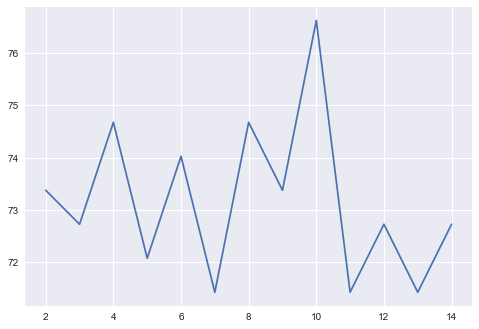

In [203]:
acc = []
ran = range(2,15)
for k in ran:
    k_clf = KNeighborsClassifier(n_neighbors=k) 
    k_clf.fit(X_train,y_train)
    test_score = k_clf.score(X_test,y_test)
    acc.append(test_score*100)
sns.lineplot(ran,acc)    

### Best k value is 10

In [204]:
k_clf = KNeighborsClassifier(n_neighbors=10,weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', \
                             metric_params=None, n_jobs=None)

In [205]:
k_clf.fit(X_train,y_train)
k_pred = k_clf.predict(X_test)

In [206]:
accuracy_score(y_test,k_pred)


0.7662337662337663

In [207]:
print(classification_report(y_test,k_pred))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80        99
           1       0.63      0.85      0.72        55

    accuracy                           0.77       154
   macro avg       0.76      0.79      0.76       154
weighted avg       0.80      0.77      0.77       154



### The accuracy score of KNN Algorithm is lesser than other algorithms ( Logistic Regression, Random Forest, XGBoost, SVM)

## Classification Report Analysis

###### Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used. 

#### Let's use XGBoost classification Report to do the analysis

In [180]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,xg_pred)

array([[88, 11],
       [10, 45]], dtype=int64)

In [181]:
Sensitivity = 88/(88+10)
specificity = 45/(11+45)

In [182]:
print('Sensitivity =',Sensitivity)
print('Specificity = ',specificity )

Sensitivity = 0.8979591836734694
Specificity =  0.8035714285714286


## ROC curve

In [208]:
# Logistic Regression
pred_lr = lr.predict(X_test)

# Random Forest Classifier
pred_rfc = rf_clf.predict(X_test)

# XGBoost Classifier
xg_pred = xg_clf.predict(X_test)

# SVM classifier
pred_svm = svmc.predict(X_test)

# KNN Classifier
k_pred = k_clf.predict(X_test)

In [209]:
# Logistic Regression
pred_lr_prob = lr.predict_proba(X_test)

# Random Forest Classifier
pred_rfc_prob = rf_clf.predict_proba(X_test)

# XGBoost Classifier
xg_pred_prob = xg_clf.predict_proba(X_test)

# SVM classifier
# pred_svm_prob = svmc.predict_proba(X_test)

# KNN Classifier
k_pred_prob = k_clf.predict_proba(X_test)

In [210]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_lr_prob[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_rfc_prob[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, xg_pred_prob[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, k_pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

## AUC Score

In [211]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_lr_prob[:,1])
auc_score2 = roc_auc_score(y_test, pred_rfc_prob[:,1])
auc_score3 = roc_auc_score(y_test, xg_pred_prob[:,1])
auc_score4 = roc_auc_score(y_test, k_pred_prob[:,1])

print(auc_score1, auc_score2, auc_score3, auc_score4)

0.8460973370064279 0.9320477502295684 0.9320477502295684 0.851606978879706


## Plotting ROC curve

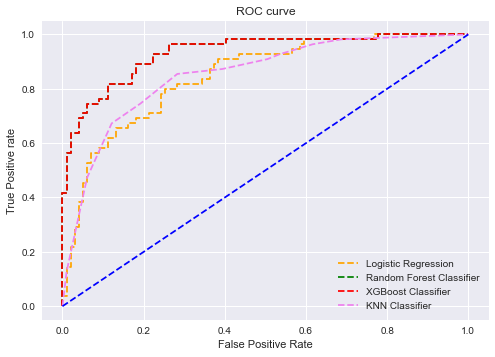

In [212]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest Classifier')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='XGBoost Classifier')
plt.plot(fpr4, tpr4, linestyle='--',color='violet', label='KNN Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## Writing data to excel

In [202]:
df.to_excel('diabetes_wo_missingvalue.xlsx', sheet_name='Diabetes Data')
